# End-to-End EDA Process

> Like any other scientific data analysis, EDA is a complex mixture of rigorous scientific practice and intuitive craft. While a knowledge of best practice for a given step will help you avoid most of the common pitfalls, there is no purely algorithmic protocol that can be applied in a completely 'by the book' manner to every dataset. We can't even say with confidence which of the main steps in the process should occur in what order. 

Instead we must rely on heuristics built up by actually working with data, and the best way to get started on that journey is to actually analyse some data together. So let's get going!

In [ ]:
#@title ### Run the following cell to download the necessary files for this lesson { display-mode: "form" } 
#@markdown Don't worry about what's in this collapsed cell

print('Downloading style.py...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/9f118680-0bab-4990-9f17-46124e70e7ea/style.py -q -O style.py
import style
print('Downloading house_price_dataset_with_nulls.csv...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/9f118680-0bab-4990-9f17-46124e70e7ea/house_price_dataset_with_nulls.csv -q -O house_price_dataset_with_nulls.csv
print('Downloading house_price_dataset_original_v2_cleaned.csv...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/9f118680-0bab-4990-9f17-46124e70e7ea/house_price_dataset_original_v2_cleaned.csv -q -O house_price_dataset_original_v2_cleaned.csv
print('Downloading jiffs_house_price_my_dataset_v1.csv...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/9f118680-0bab-4990-9f17-46124e70e7ea/jiffs_house_price_my_dataset_v1.csv -q -O jiffs_house_price_my_dataset_v1.csv
print('Downloading house_price_dataset_original_v2_with_categorical_features.csv...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/9f118680-0bab-4990-9f17-46124e70e7ea/house_price_dataset_original_v2_with_categorical_features.csv -q -O house_price_dataset_original_v2_with_categorical_features.csv


## The Dataset

> The dataset we are going to use is a modification of `Jiff's House Price Prediction Dataset`, a public-domain dataset hosted on Kaggle [here](https://www.kaggle.com/datasets/elakiricoder/jiffs-house-price-prediction-dataset). It's also generally good to have at least a loose purpose behind an EDA project, so in our case we'll assume that we are hoping to estimate the property values from the other features.

Let's start by loading the dataset's `csv` file into a `Pandas` dataframe, and taking a look at the first few lines:

In [3]:
import pandas as pd

df = pd.read_csv('house_price_dataset_with_nulls.csv')
df.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,property_value
0,201,177,3,1.0,0,1,1,0,3.3,1,10,0,6.8,167611.0
1,196,182,4,3.0,1,1,0,1,1.2,1,11,0,4.1,NaN
2,198,182,4,4.0,1,1,0,1,5.9,0,20,0,2.1,154628.0
3,178,166,2,3.0,0,1,0,0,5.9,0,5,0,NaN,133099.0
4,183,165,3,1.0,1,1,0,0,3.8,1,8,0,0.7,158481.0


Even by printing the head of the table, we already know something important! 

The first piece of good news is that the data appear to adhere to the [Tidy](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) principle. 

>Tidy data is a term introduced by statistician Hadley Wickham that refers to a standard way of mapping the semantics of a dataset to its physical layout. 

In tidy data:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

In our case, we can see that each row corresponds to a single house, and each column corresponds to a descriptive feature pertaining to that house.

We can also see that all the data types are numeric in nature, though some appear to be continuous (eg. `house_size_sqm`), while others appear to be categorical, either ordinal (eg. `number_of_rooms` ) or nominal/Boolean (eg. `front_garden`). 

Finally, we can tell there are at least some `NaN`s in there, which we will need to decide how to handle.

## `null`s and imputation

Next, let's check the dataset for `null` values. the quickest way to do this is with the `df.info()` method. However care should be taken using this method for non-numeric columns, as there are many other ways for text data to end up scrambled without being a true `null` value.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4792 non-null   float64
 4   large_living_room           4954 non-null   int64  
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school_km       4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age_or_renovated      4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4685 non-null   float64
 13  property_value              4907 

Ok so first thing we can see is that all the columns are appropriately cast as either `float64` or `int`. If your dataset isn't so accommodating, it is often a good idea to get things arrange in this way. If your pipeline includes any ML then you'll need to convert any text-based categories to numeric at some point via encoding, however at the EDA stage this is not usually necessary.

Next, we can see we have some `null`s in there! The columns which contain `null`/`NaN` values are: 
-  `no_of_bathrooms`
- `distance_to_supermarket_km`
- `property_value`

### Number of Bathrooms

Let's look at them in order. The first one, `no_of_bathrooms`, sounds like an ordinal categorical variable from its name, but let's check that, and also determine the percentage of `null` values.

In [15]:

print(f"Percentage of nulls: {df['no_of_bathrooms'].isnull().sum()/len(df)}")
df["no_of_bathrooms"].value_counts()

Percentage of nulls: 0.03270084779975777


2.0    1182
3.0    1011
4.0     907
5.0     713
1.0     687
6.0     113
7.0     103
8.0      56
9.0      20
Name: no_of_bathrooms, dtype: int64

Our intuition looks correct here. We have ordinal categorical data with around 3% of values missing as `null`s. In this instance the best strategy is probably to impute the missing data. While we're at it, let's plot the probability distribution to see how it looks:

In [3]:
#@title Run the hidden cell below to set up plot styles for the rest of the notebook
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.rc("axes.spines", top=False, right=False)
sns.set_style(style='darkgrid', rc=None)
style.use('fivethirtyeight')
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)



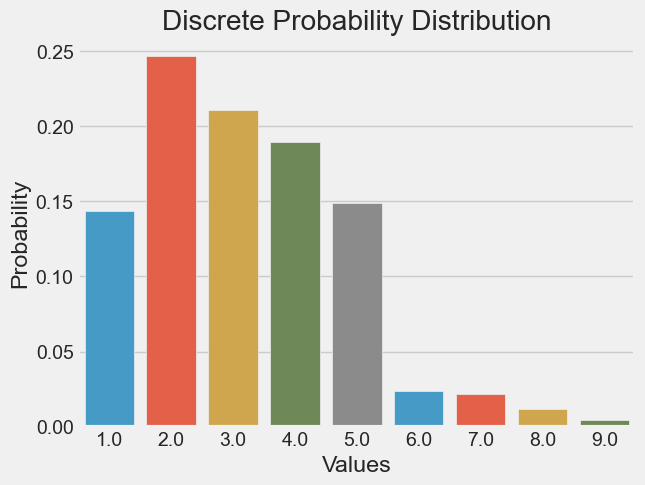

The mode of the distribution is 2.0
The mean of the distribution is 3.1936560934891487
The median of the distribution is 3.0


In [23]:
# Calculate value counts and convert to probabilities
probs = df['no_of_bathrooms'].value_counts(normalize=True)

# Create bar plot
dpd=sns.barplot(y=probs.values, x=probs.index,palette=five_thirty_eight)

plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution')
plt.show()
print(f"The mode of the distribution is {df['no_of_bathrooms'].mode()[0]}")
print(f"The mean of the distribution is {df['no_of_bathrooms'].mean()}")
print(f"The median of the distribution is {df['no_of_bathrooms'].median()}")

Assuming the nulls are *randomly distributed (MCAR)*, we could choose to impute them with the mean, median or mode of the distribution. In favour of the mode, it is the default choice for categorical data, however these data are ordinal, and the modal value of 2 isn't vastly more prevalent than the next highest values. In this instance, my instinct would be to choose the median.

But first, we should check if we can find evidence for our missing-completely-at-random assumption. One option comes from the `number_of_rooms` column, which one might expect to be correlated to `number_of_bathrooms`.

<Axes: >

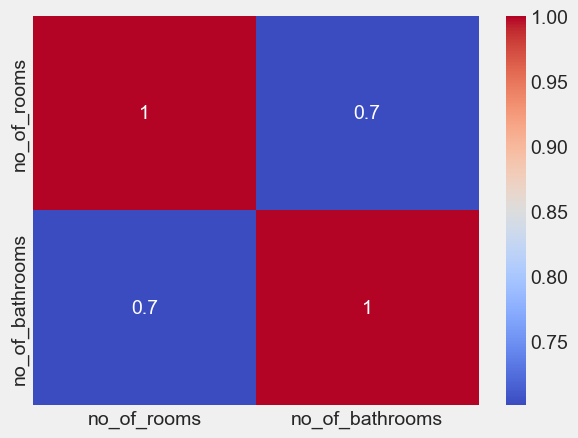

In [43]:
# check correlation between `number_of_rooms` and `number_of_bathrooms`:

sns.heatmap(df[['no_of_rooms','no_of_bathrooms']].corr(), annot=True, cmap='coolwarm')

As expected, there is a fairly high correlation between the two columns (71%). We can now use a Chi-Squared test to check to see if there is any trend in the frequency of NaNs in `no_of_bathrooms`, as a function of `no_of_rooms`.

> The Chi-squared test is a statistical hypothesis test that is used to determine whether there is a significant association between two categorical variables in a sample. We can use the implementation in `scipy.stats`.

In [38]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create a new column indicating whether A is missing
df['missing_bathrooms'] = df['no_of_bathrooms'].isnull()

# Step 2: Crosstab the new column with B
contingency_table = pd.crosstab(df['missing_bathrooms'], df['no_of_rooms'])

# Step 3: Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic = {chi2}")
print(f"p-value = {p}")

Chi-square statistic = 8.37207508303926
p-value = 0.300930352237297


Running the code block above, we can see that the `p-value` is much greater than 0.05, so we can assume that the `NaN`s are randomly distributed with respect to the value of `no_of_rooms`. This doesn't prove to use that the `NaN`s are MCAR, but it's evidence in favour of that assumption. Let's go ahead and impute with the median:

In [39]:
df['no_of_bathrooms'] = df['no_of_bathrooms'].fillna(df['no_of_bathrooms'].median())


### Distance from Supermarket

Ok that was quite a long job! The others should be much quicker! Turning to `distance_to_supermarket_km` we can quickly see that this is a continuous variable with around 5% `null`s and a relatively flat distribution of values. 

Percentage of nulls: 0.054299555914412594


<Axes: xlabel='Count', ylabel='distance_to_supermarket_km'>

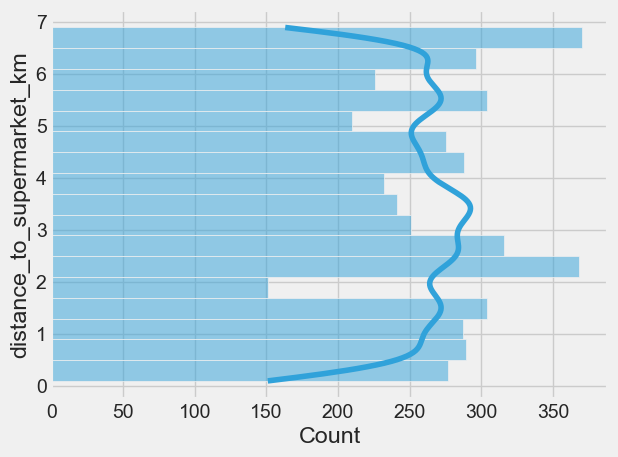

In [47]:
print(f"Percentage of nulls: {df['distance_to_supermarket_km'].isnull().sum()/len(df)}")
sns.histplot(data=df, y="distance_to_supermarket_km", kde=True)


In this case it's pretty safe to impute the values and use the mean to do so, again under the assumption of MCAR, though in this case there isn't really a variable we can use to corroborate that. We will just have to hope that distance from supermarket isn't a huge driver of house prices! Actually, let's just check that really quickly, and at the same time get a first look at the full correlation matrix for the dataset.

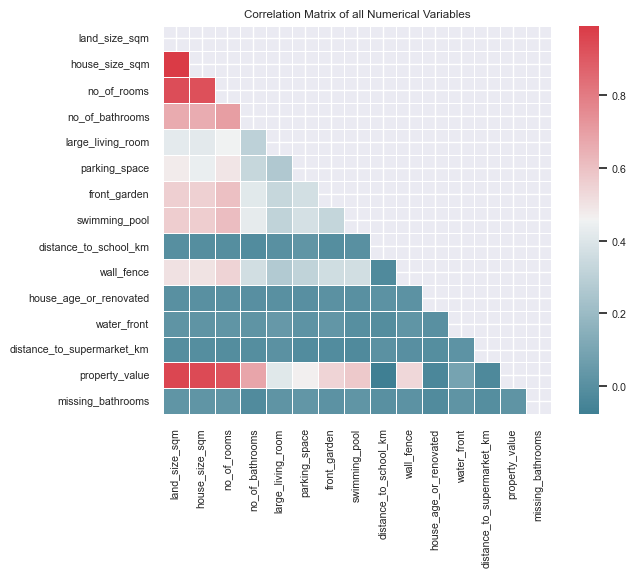

In [88]:
import numpy as np
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

Ok, so we can see that this variable doesn't appear to be strongly correlated with house prices, so we can take the risk and impute with the mean:

In [52]:
df['distance_to_supermarket_km'] = df['distance_to_supermarket_km'].fillna(df['distance_to_supermarket_km'].mean())

### Property Value

Finally, we need to clean the `property_value` column. In this exercise we're assuming that these are our prediction targets, so there's no point in imputing the values based on the other columns: that would be circular reasoning! Instead we might as well drop the entire row whenever the price data is missing. This is especially true as we're losing <1% of our dataset by doing this.

In [53]:
# drop any row where `property_value` is null:
df = df.dropna(subset=['property_value'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 entries, 0 to 4953
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4907 non-null   int64  
 1   house_size_sqm              4907 non-null   int64  
 2   no_of_rooms                 4907 non-null   int64  
 3   no_of_bathrooms             4907 non-null   float64
 4   large_living_room           4907 non-null   int64  
 5   parking_space               4907 non-null   int64  
 6   front_garden                4907 non-null   int64  
 7   swimming_pool               4907 non-null   int64  
 8   distance_to_school_km       4907 non-null   float64
 9   wall_fence                  4907 non-null   int64  
 10  house_age_or_renovated      4907 non-null   int64  
 11  water_front                 4907 non-null   int64  
 12  distance_to_supermarket_km  4907 non-null   float64
 13  property_value              4907 

## Checking the distributions

The next main stage of the EDA pipeline to consider is to check our variables for skewness, and to take a general look at any insights we can get from the distributions.  This test is really only appropriate for continuous and ordinal data, so we'll first select those features from the column list, and then apply a histogram with KDE to each, using `Seaborn`'s `FacetGrid` class. You can read about this in more detail in the `Seaborn` [docs](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

['large_living_room', 'parking_space', 'front_garden', 'swimming_pool', 'wall_fence', 'water_front', 'missing_bathrooms']


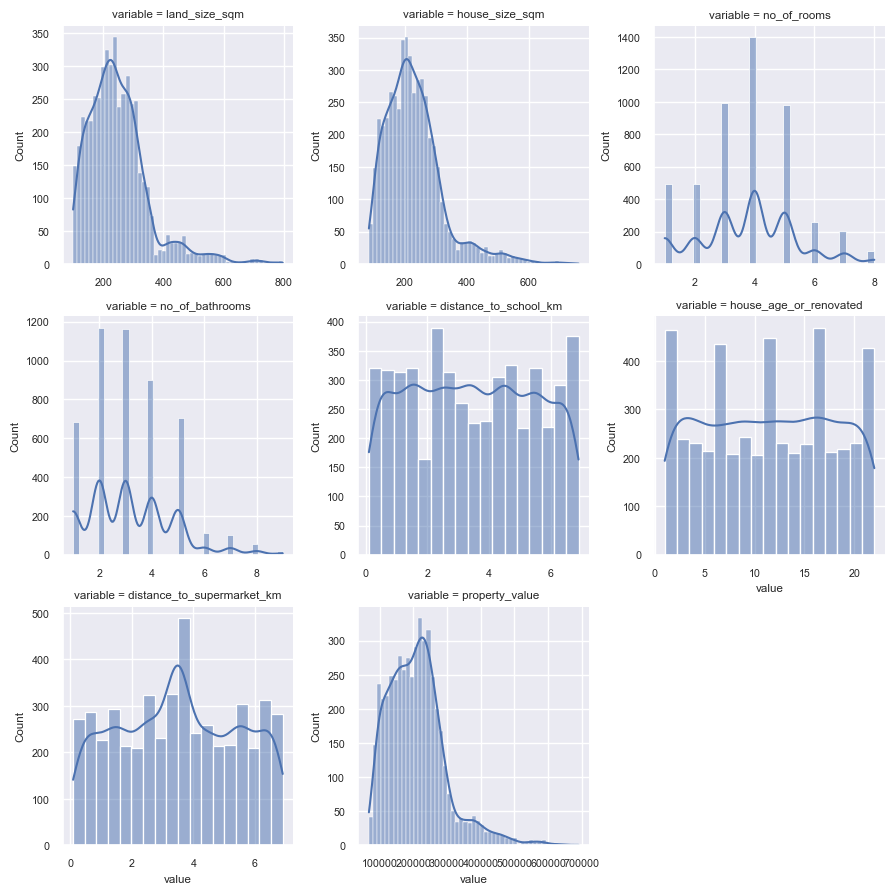

In [66]:


# Set numeric (ie. continuous or ordinal category) features:
numeric_features = ['land_size_sqm',
                    'house_size_sqm',
                    'no_of_rooms',
                    'no_of_bathrooms',
                    'distance_to_school_km',
                    'house_age_or_renovated',
                    'distance_to_supermarket_km',
                    'property_value'
                    ]

categorical_features = [col for col in df.columns if col not in numeric_features]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

print(categorical_features)


A few noteworthy matters arise from the `Facetgrid `plot:
- `land_size `and `house_size` look strongly autocorrelated. We should make a note of this to check for collinearity later.
- Both the aforementioned variables appear to be somewhat right-skewed as well, with a long tail of high values
- Other values look either normally or uniformly distributed, apart from `number_of_bathrooms`, which is a bit skewed, but hard to correct as the dispersion is small and the values categorical

### Correcting Skew

Let's check the skew in the `land_size_sqm` column. We can use a Q-Q plot to check.

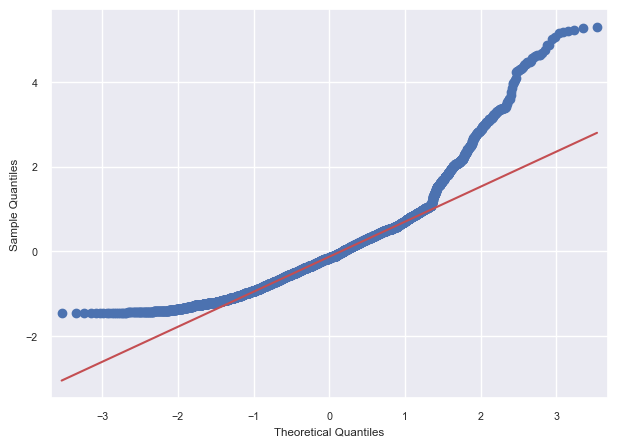

count    4907.000000
mean      250.145914
std       103.077160
min       100.000000
25%       180.000000
50%       235.000000
75%       295.000000
max       796.000000
Name: land_size_sqm, dtype: float64

In [75]:
from statsmodels.graphics.gofplots import qqplot


qq_plot = qqplot(df['land_size_sqm'] , scale=1 ,line='q', fit=True)
plt.show()
df['land_size_sqm'].describe()

Yep, that's a fair bit of skew, and a big gap between the 3rd quartile and the max! Let's see if it looks better after a log transform:

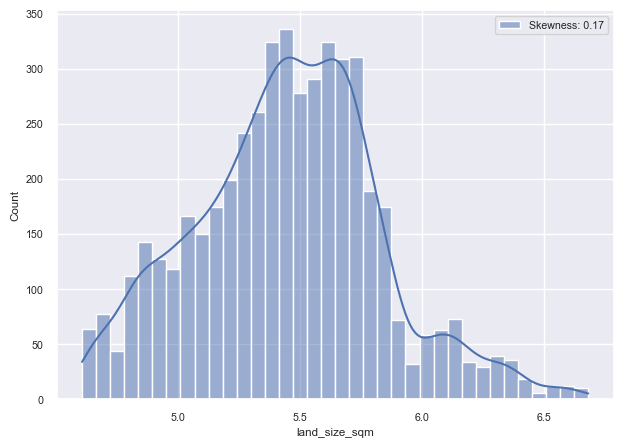

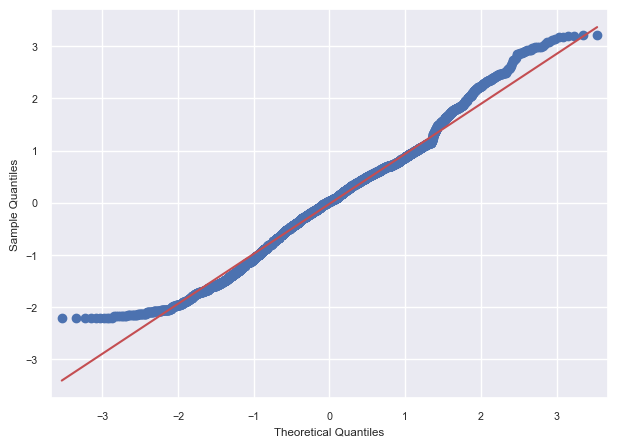

In [83]:
log_landsize = df["land_size_sqm"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_landsize,label="Skewness: %.2f"%(log_landsize.skew()), kde=True )
t.legend()
qq_plot = qqplot(log_landsize , scale=1 ,line='q', fit=True)
plt.show()

We could probably eliminate skew even more completely with a Box-Cox transform, but a log transform has the advantage of being much easier to interpret. This will suffice for our purposes. We can go ahead and transform `house_size_sqm` with the same approach, as they are essentially the same distribution!

In [84]:
df["land_size_sqm"] = df["land_size_sqm"].map(lambda i: np.log(i) if i > 0 else 0)
df["house_size_sqm"] = df["house_size_sqm"].map(lambda i: np.log(i) if i > 0 else 0)

For completeness, let's also do count plots of our nominal category data. We probably can't do much to these as they're all Booleans, but it's useful to know how balanced they are in case we wanted to implement any machine learning methods later in the pipeline. 

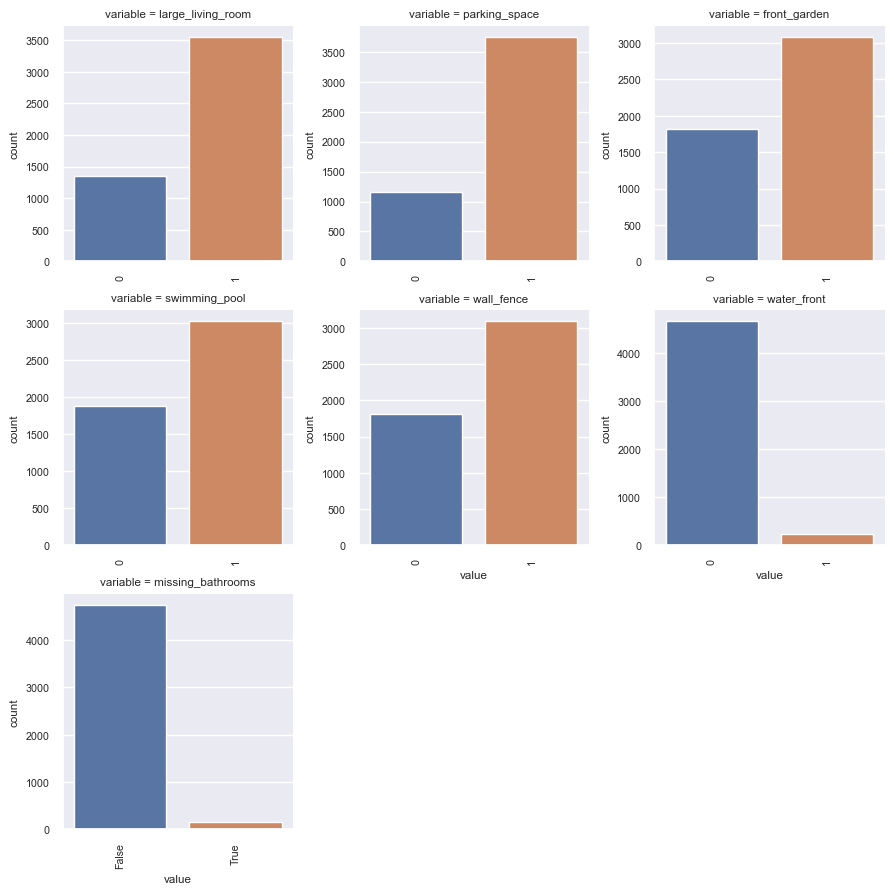

In [70]:
def countplot(x, **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df, value_vars=categorical_features)
g = sns.FacetGrid(f, col='variable',  col_wrap=3, sharex=False, sharey=False)
g = g.map(countplot, 'value')

From this we can see that `water_front` and `missing_bathrooms` are both very unbalanced. There are strategies for handling unbalanced variables in ML, but those are well outside the scope of this lesson. For now, we can just note these variables.


## Summary Plots

We're not too far off being done with our EDA mini-project! Let's summarise the relationships between the variables using a pair plot, and then re-plot the correlation matrix now that we have fixed a few issues in the dataset.


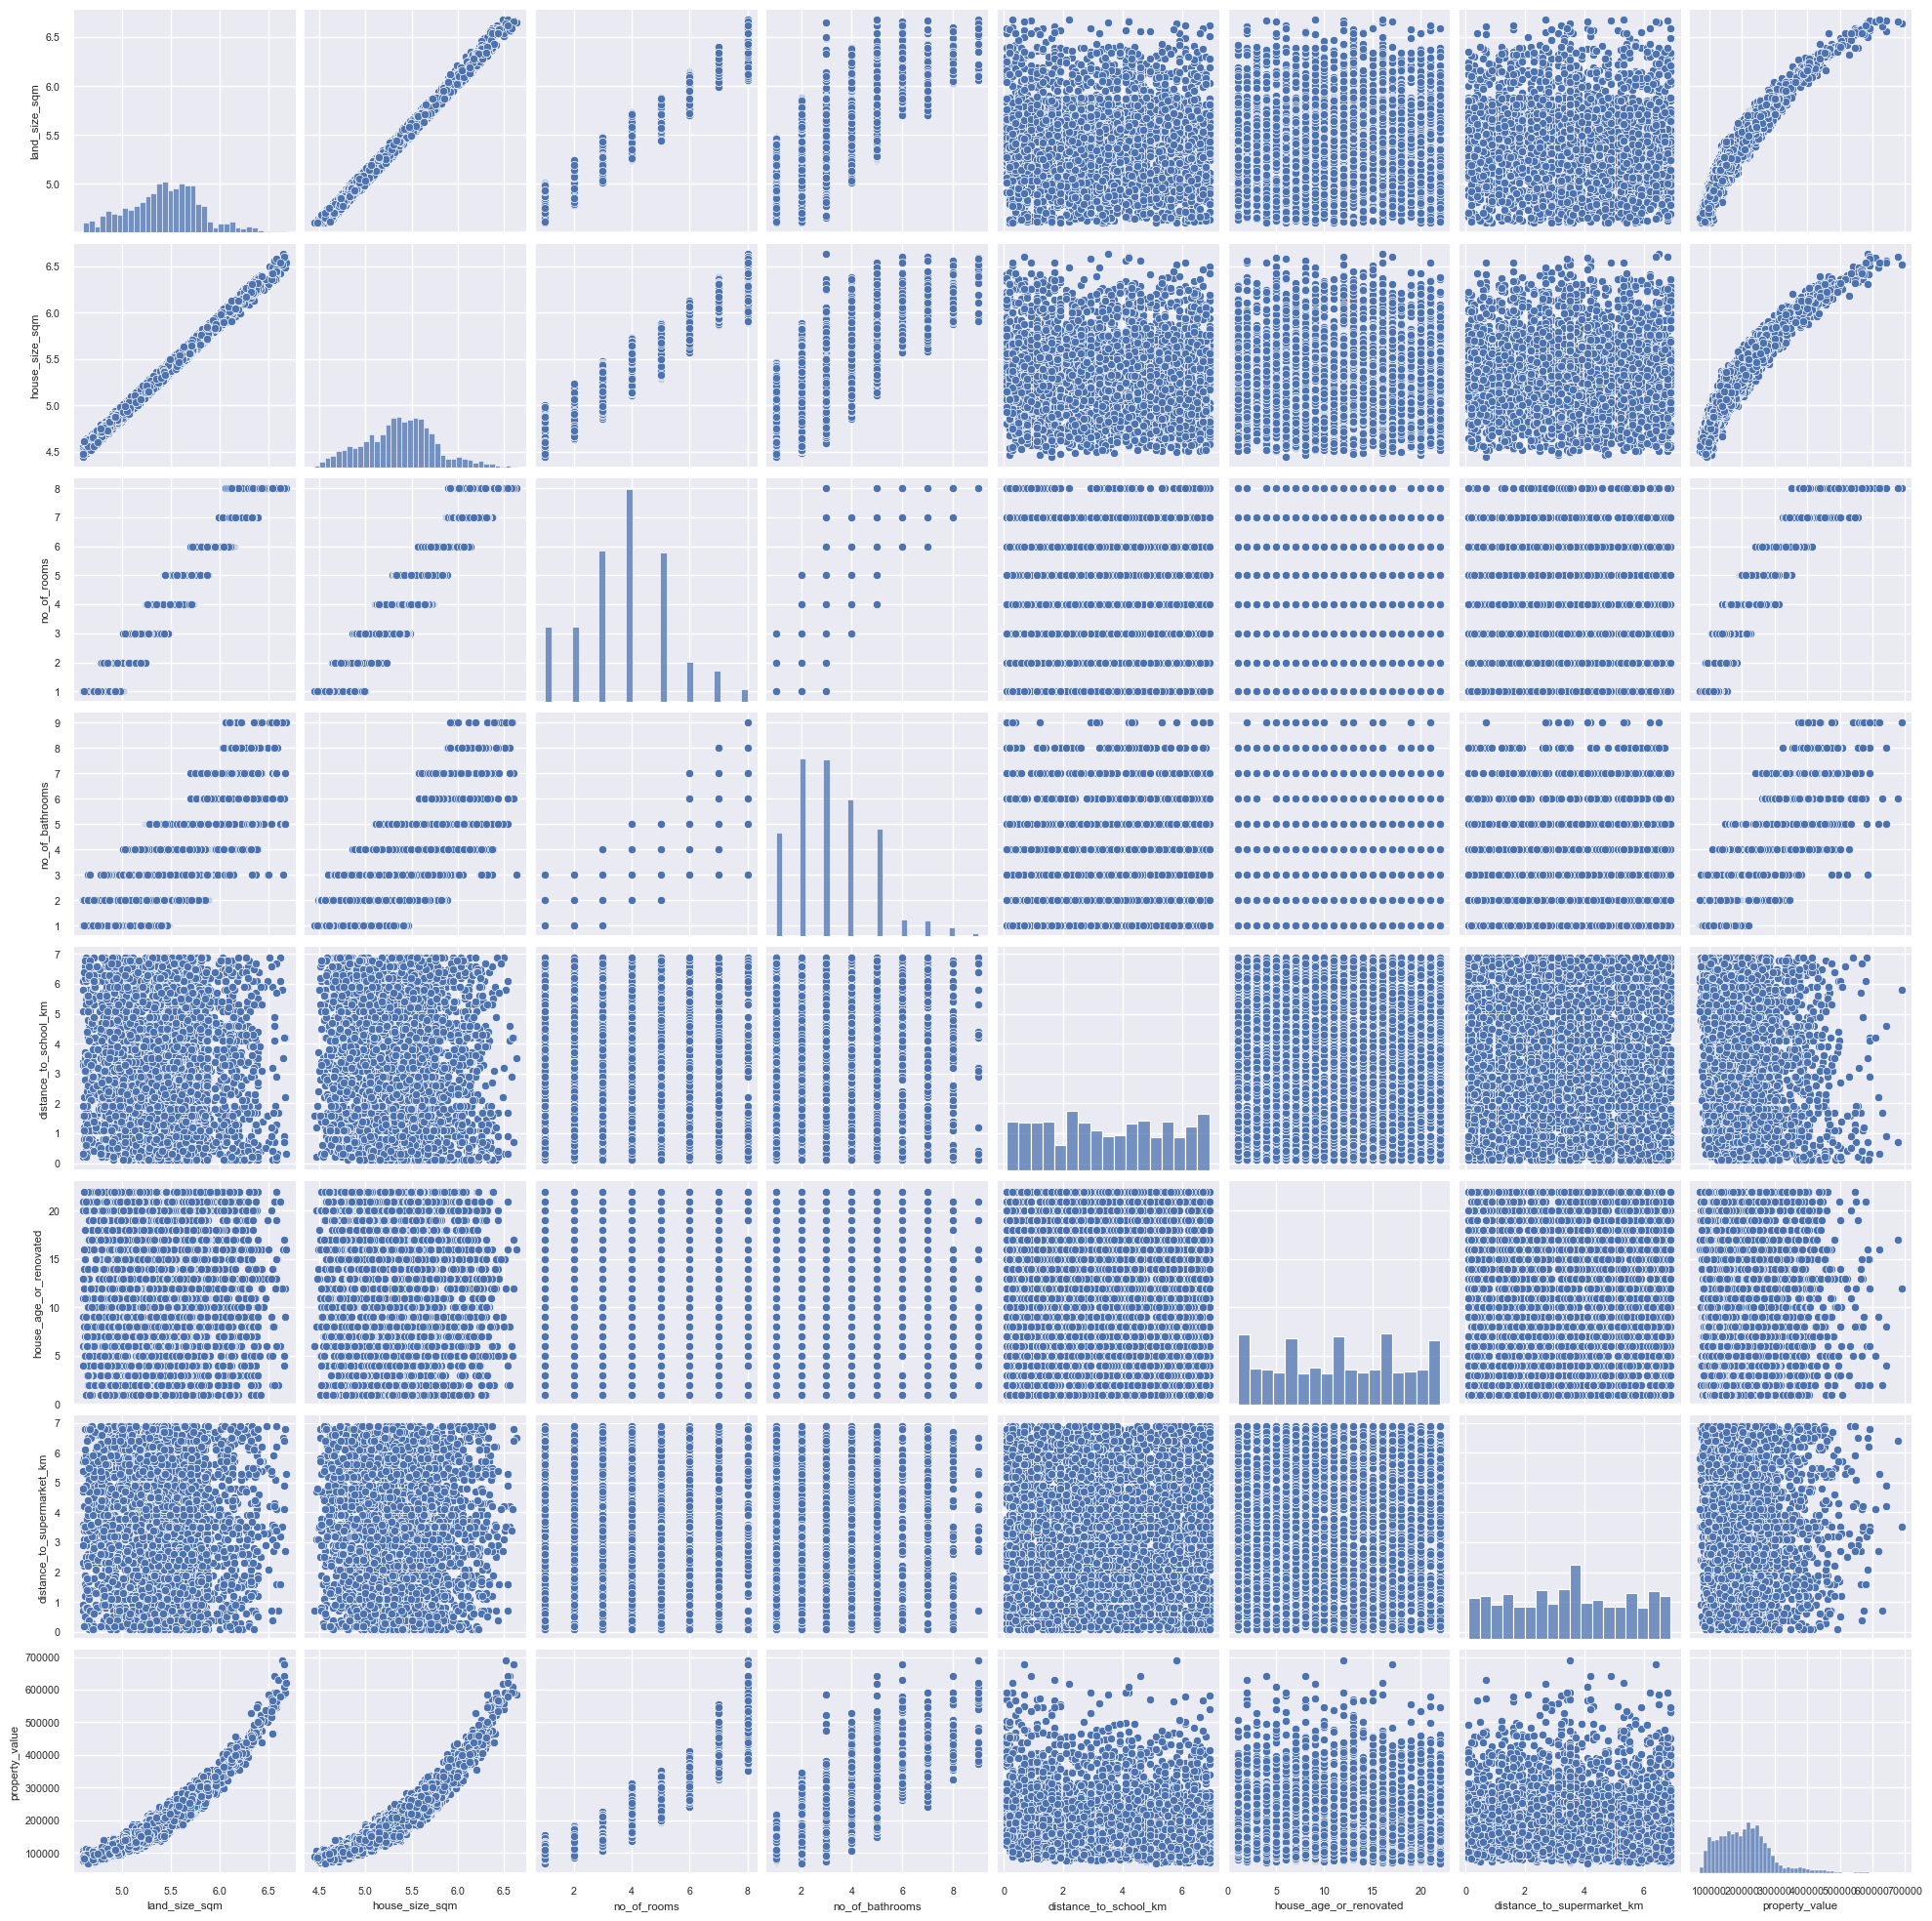

In [86]:
sns.pairplot(df[numeric_features])

Ok, that's a bit of an "eye chart", but we can see some interesting things here if we look at it for a bit. 

Firstly, that top-right corner is yet more evidence of collinearity between the land area and house size.

<img src="images/top_left_corner.png" alt="Types of Skew" width="400" >


 That's not far off a y=x relationship! Number of rooms and number of bathrooms also appear to correlate fairly strongly. 

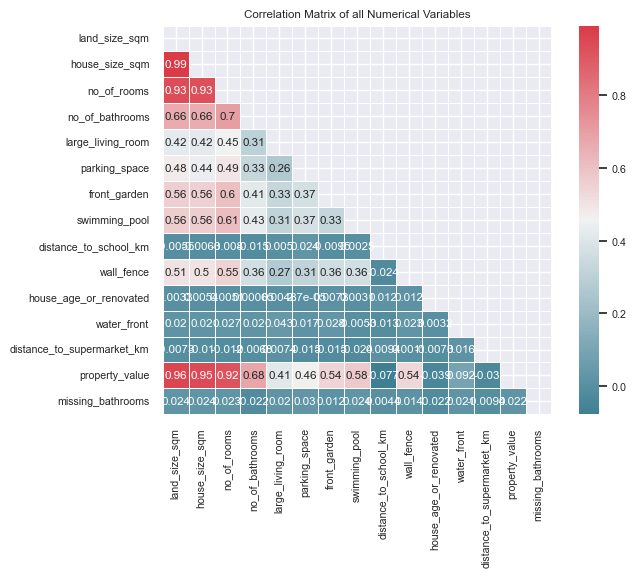

In [89]:
corr = df.corr()
# Draw the heatmap
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

Not a huge amount has changed in our final correlation map, but now we can see that `land_size_sqm`, `house_size_sqm`, and `no_of_rooms` are all strongly collinear. In general 90% is a rule-of-thumb cutoff for where collinearity becomes a major problem for interpretability. As covered in the earlier lesson on this topic though, whether we should do anything about it depends on the rest of our pipeline, and it's fair to say that it generally falls outside of the tasks involved in EDA. 

We should also note that a number of variables appear to be well-correlated with our target variable. These are:
- `land_size_sqm`
- `house_size_sqm`
- `no_of_rooms`
- `no_of_bathrooms`
- `front_garden`
- `swimming_pool`
- `wall_fence`

We should also note that `water_front` is a variable one might expect to drive house prices, but has a low correlation coefficient here. But remember we previously noted how unbalanced that variable was. This is a possible cause of low correlation coefficient, so we should bare this in mind if we decide to take this project further by applying some ML modelling.

## Key Takeaways

- EDA is a mixture of rigorous scientific skills and intuitive craft that you learn by experience
- The best way to build up good EDA heuristics is by doing it
- A typical EDA project will involve some data cleaning: handling and imputing `null`s, casting data to correct type, and checking for and possibly transforming skewed data
- After handling these issues, the main things to check for are:
    - Correlations between variables (particularly against the target variable if you have one)
    - Outliers and anomalous distributions
    - potential examples of collinearity